<a href="https://colab.research.google.com/github/PrasDev4/Student_Performance_Prediction/blob/main/Student_performance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("data.csv")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's occupation,Father's occupation,Admission grade,...,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP,Target
0,1,17,5,171,1,1,122.0,5,9,127.3,...,0.000000,0,0,0,0,0,0.000000,0,1.74,Dropout
1,1,15,1,9254,1,1,160.0,3,3,142.5,...,14.000000,0,0,6,6,6,13.666667,0,0.79,Graduate
2,1,1,5,9070,1,1,122.0,9,9,124.8,...,0.000000,0,0,6,0,0,0.000000,0,1.74,Dropout
3,1,17,2,9773,1,1,122.0,5,3,119.6,...,13.428571,0,0,6,10,5,12.400000,0,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,9,9,141.5,...,12.333333,0,0,6,6,6,13.000000,0,0.79,Graduate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Mother's occupation                             4424 non-null   int64  
 8   Father's occupation                             4424 non-null   int64  
 9   Admission grade                          

In [ ]:
df.rename(columns = {'Nacionality':'Nationality'}, inplace=True)

In [ ]:
target_distribution = df['Target'].value_counts()
target_distribution

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


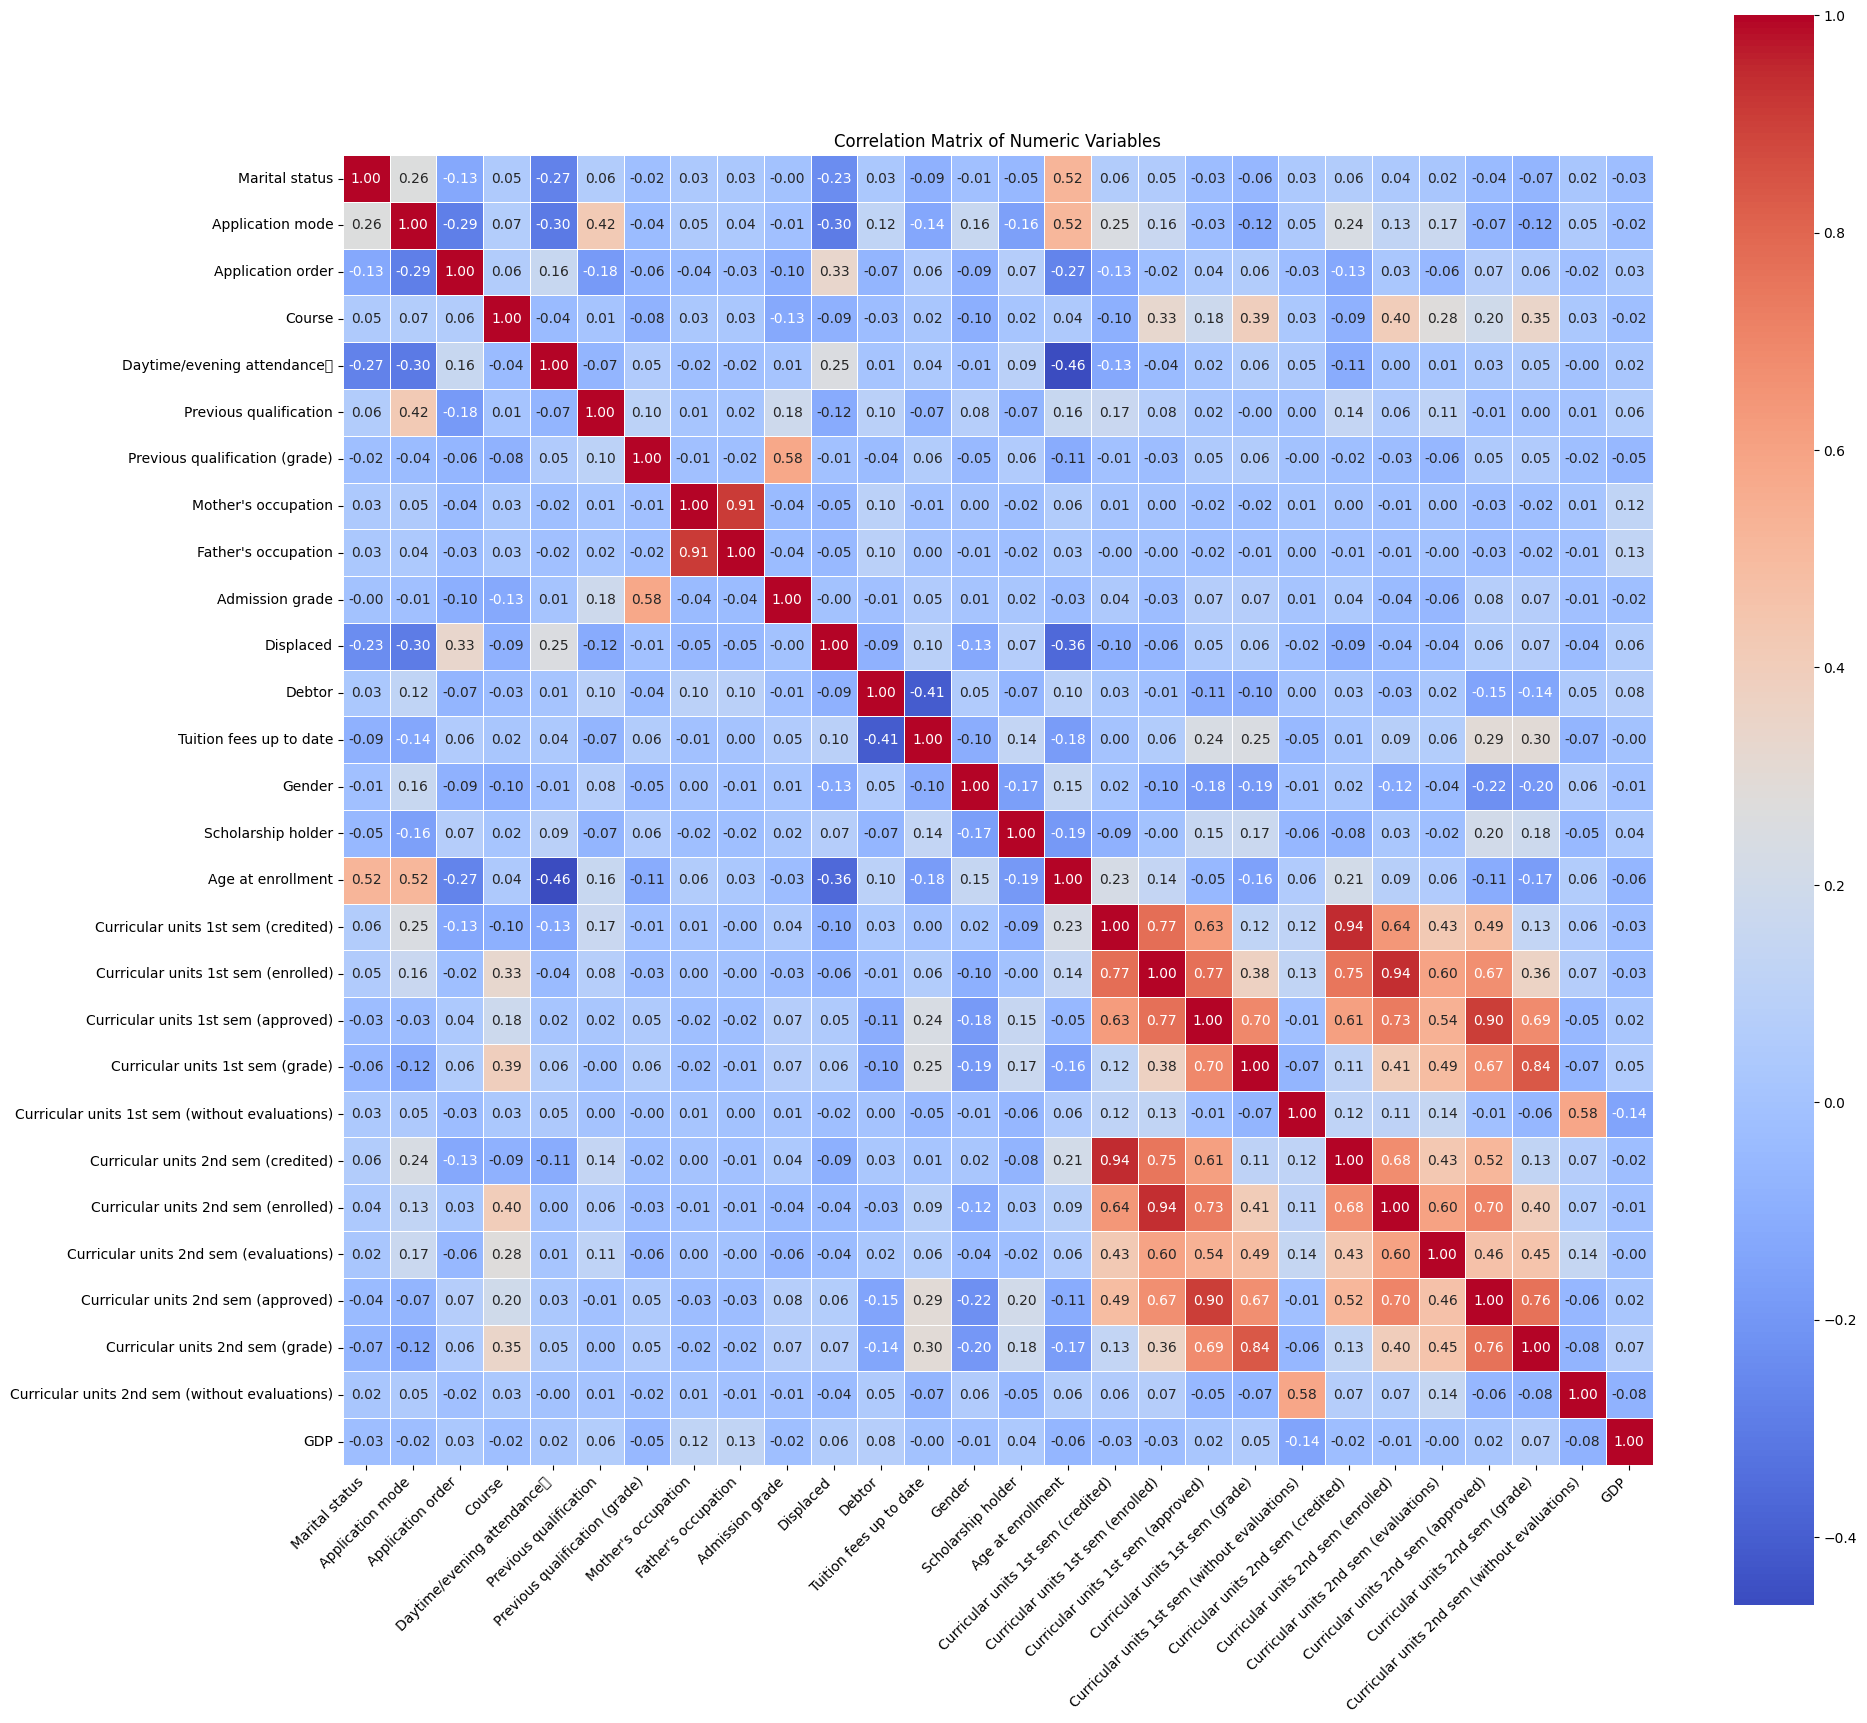

In [ ]:
# Correlation matrix
correlation_matrix = df.select_dtypes(['int64', 'float64']).corr()

# Set the size of the plot
plt.figure(figsize=(20, 18))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Rotate y-axis labels for better readability
plt.yticks()

# Set the title
plt.title('Correlation Matrix of Numeric Variables')

# Automatically adjust subplot parameters to give specified padding
plt.tight_layout()

# Show the plot
plt.show()

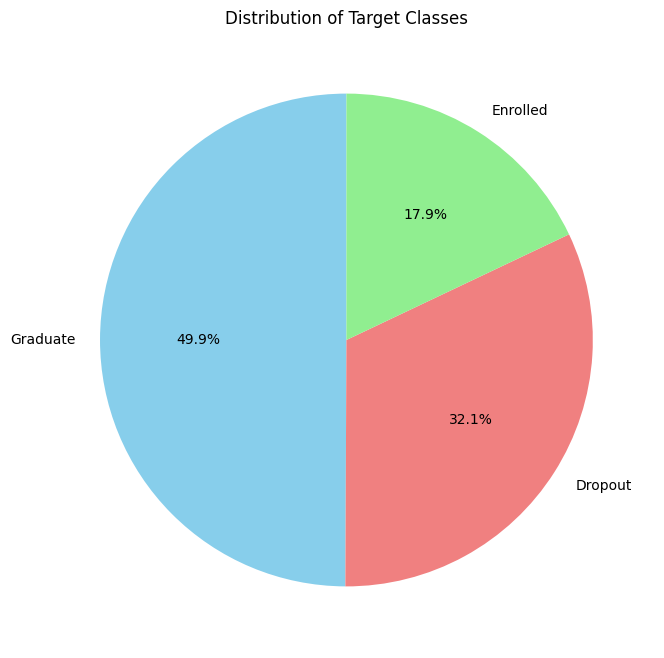

In [ ]:
class_counts = df['Target'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Target Classes')
plt.show()

In [ ]:
positive_threshold = 0.6
negative_threshold = -0.3

# Filter features with positive correlation above the threshold
positive_corr_features = correlation_matrix[correlation_matrix > positive_threshold].stack().dropna().reset_index()
positive_corr_features.columns = ['Feature 1', 'Feature 2', 'Correlation']
positive_corr_features = positive_corr_features[positive_corr_features['Correlation'] != 1]

# Filter features with negative correlation below the threshold
negative_corr_features = correlation_matrix[correlation_matrix < negative_threshold].stack().dropna().reset_index()
negative_corr_features.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Sort positive correlations in descending order
positive_corr_features = positive_corr_features.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

# Display positive correlations
print("Features with Positive Correlation:")
print(positive_corr_features[['Feature 1', 'Feature 2', 'Correlation']])

# Sort negative correlations in descending order
negative_corr_features = negative_corr_features.sort_values(by='Correlation', ascending=True).reset_index(drop=True)

# Display negative correlations
print("\nFeatures with Negative Correlation:")
print(negative_corr_features[['Feature 1', 'Feature 2', 'Correlation']])

Features with Positive Correlation:
                                 Feature 1  \
0      Curricular units 1st sem (credited)   
1      Curricular units 2nd sem (credited)   
2      Curricular units 1st sem (enrolled)   
3      Curricular units 2nd sem (enrolled)   
4                      Mother's occupation   
5                      Father's occupation   
6      Curricular units 2nd sem (approved)   
7      Curricular units 1st sem (approved)   
8         Curricular units 2nd sem (grade)   
9         Curricular units 1st sem (grade)   
10     Curricular units 1st sem (credited)   
11     Curricular units 1st sem (enrolled)   
12     Curricular units 1st sem (approved)   
13     Curricular units 1st sem (enrolled)   
14        Curricular units 2nd sem (grade)   
15     Curricular units 2nd sem (approved)   
16     Curricular units 1st sem (enrolled)   
17     Curricular units 2nd sem (credited)   
18     Curricular units 1st sem (approved)   
19     Curricular units 2nd sem (enrolled)  

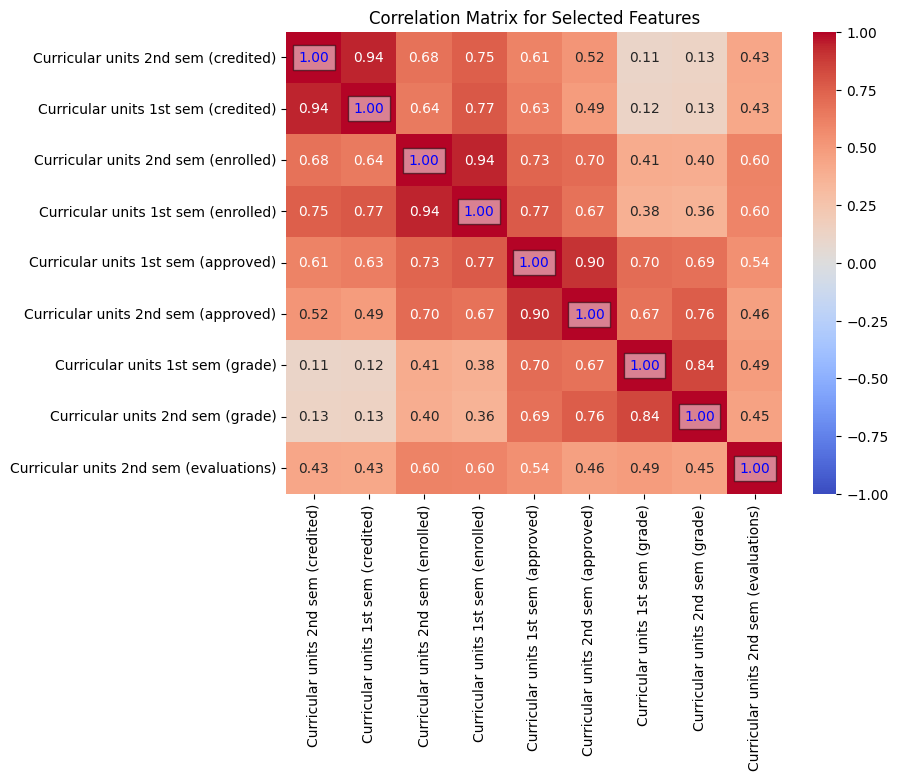

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
selected_features = ['Curricular units 2nd sem (credited)', 'Curricular units 1st sem (credited)', 'Curricular units 2nd sem (enrolled)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (approved)','Curricular units 2nd sem (approved)','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (evaluations)']

# Calculate correlation matrix for selected features
corr_matrix = df[selected_features].corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
for text in plt.gca().texts:
    if text.get_text() == '1.00':
        text.set_color('blue')
        text.set_bbox({'facecolor': 'white', 'alpha': 0.5})
plt.title('Correlation Matrix for Selected Features')
plt.show()

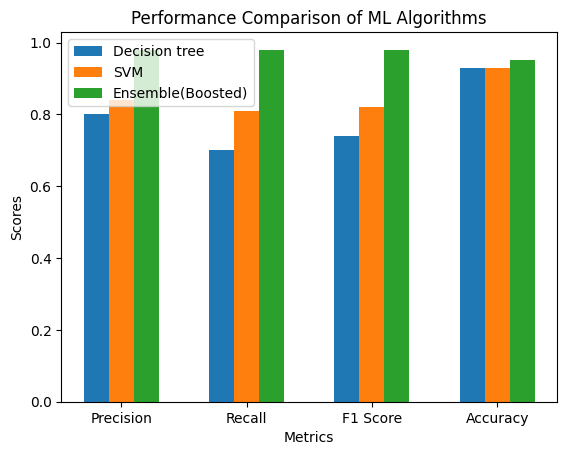

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the categories
categories = ['Precision', 'Recall', 'F1 Score', 'Accuracy']

# Define the values for each category
values1 = [0.8, 0.7, 0.74, 0.93]  # Values for Decision tree
values2 = [0.84, 0.81, 0.82, 0.93]  # Values for SVM
values3 = [0.98, 0.98, 0.98, 0.95]  # Values for Ensemble(Boosted)

# Define the width of each bar
bar_width = 0.2

# Set the positions of the bars on the x-axis
x = np.arange(len(categories))

# Create the grouped bar plot
plt.bar(x - 0.2, values1, width=bar_width, label='Decision tree')
plt.bar(x, values2, width=bar_width, label='SVM')
plt.bar(x + 0.2, values3, width=bar_width, label='Ensemble(Boosted)')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Comparison of ML Algorithms')
plt.xticks(x, categories)
plt.legend()

# Show the plot
plt.show()


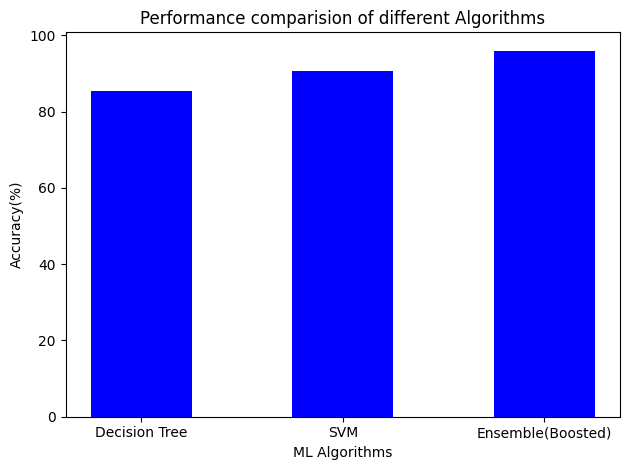

In [ ]:
import matplotlib.pyplot as plt

# Define the categories and their respective values
categories = ['Decision Tree', 'SVM', 'Ensemble(Boosted)']
values = [85.3, 90.6, 96]  # Values for the single bars

# Define the width of the bars
bar_width = 0.5  # Adjust this value as needed

# Create a bar graph
plt.bar(categories, values, color='blue', width=bar_width)

# Add labels and title
plt.xlabel('ML Algorithms')
plt.ylabel('Accuracy(%)')
plt.title('Performance comparision of different Algorithms')
plt.tight_layout()
# Show the plot
plt.show()


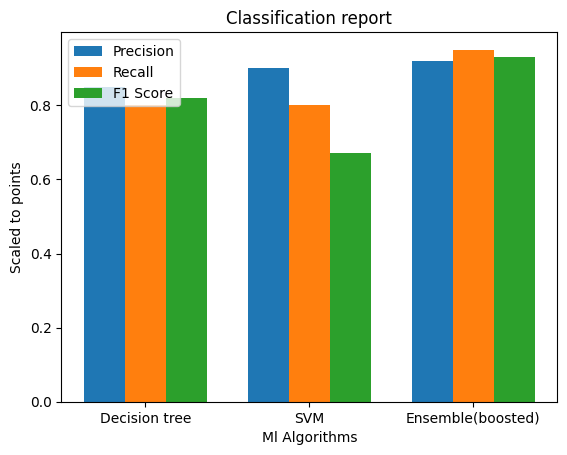

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the categories
categories = ['Decision tree', 'SVM', 'Ensemble(boosted)']

# Define the values for each category
values1 = [0.85, 0.9, 0.92]  # Values for Category 1
values2 = [0.8, 0.8, 0.95]  # Values for Category 2
values3 = [0.82, 0.67, 0.93]  # Values for Category 3

# Define the width of each bar
bar_width = 0.25

# Set the positions of the bars on the x-axis
x = np.arange(len(categories))

# Create the grouped bar plot
plt.bar(x - 0.25, values1, width=bar_width, label='Precision')
plt.bar(x, values2, width=bar_width, label='Recall')
plt.bar(x + 0.25, values3, width=bar_width, label='F1 Score')

# Add labels and title
plt.xlabel('Ml Algorithms')
plt.ylabel('Scaled to points')
plt.title('Classification report')
plt.xticks(x, categories)
plt.legend(loc='upper left')

# Show the plot
plt.show()
